# Linear Algebra and Python Basics

by Rob Hicks http://rlhick.people.wm.edu/stories/linear-algebra-python-basics.html

In this chapter, I will be discussing some linear algebra basics that will provide sufficient linear algebra background for effective programming in Python for our purposes.  We will be doing very basic linear algebra that by no means covers the full breadth of this topic.  Why linear algebra?  Linear algebra allows us to express relatively complex linear expressions in a very compact way.

Being comfortable with the rules for scalar and matrix addition, subtraction, multiplication, and division (known as inversion) is important for our class.

Before we can implement any of these ideas in code, we need to talk a bit about python and how data is stored.

## Python Primer

There are numerous ways to run python code.  I will show you two and both are easily accessible after installing Anaconda:

### The Spyder
is an integrated development environment (IDE).  The major advantages of Spyder is that it provides a graphical way for viewing matrices, vectors, and other objects you want to check as you work on a problem.  It also has the most intuitive way of debugging code.

   Spyder looks like this:
    ![](http://rlhick.people.wm.edu/site_pics/Spyder_1.png)
    Code can be run by clicking the green arrow (runs the entire file) or by blocking a subset and running it.
    In Windows or Mac, you can launch the Spyder by looking for the icon in the newly installed Program Folder Anaconda.  

### The Jupyter Notebook (Ipython) 
The major advantages of this approach is that you use your web browser for all of your python work and you can mix code, videos, notes, graphics from the web, and mathematical notation to tell the whole story of your python project. In fact, I am using the ipython notebook for writing these notes. 
    The Ipython Notebook looks like this:
    ![](http://rlhick.people.wm.edu/site_pics/Jupyter_1.png)
    In Windows or Mac, you can launch the Ipython Notebook by looking in the newly installed Program Folder Anaconda.

In my work flow, I usually only use the Ipython Notebook, but for some coding problems where I need access to the easy debugging capabilities of Spyder, I use it.  We will be using the Ipython Notebook interface (web browser) mostly in this class.

### Loading libraries

The python universe has a huge number of libraries that extend the capabilities of python. Nearly all of these are open source, unlike packages like stata or matlab where some key libraries are proprietary (and can cost lots of money).  In lots of my code, you will see this at the top:

In [6]:
%matplotlib inline
##import sympy as sympy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy import *

This code sets up Ipython Notebook environments (lines beginning with `%`), and loads several libraries and functions.  The core scientific stack in python consists of a number of free libraries.  The ones I have loaded above include:

1. sympy: provides for symbolic computation (solving algebra problems)
2. numpy: provides for linear algebra computations
3. matplotlib.pyplot: provides for the ability to graph functions and draw figures
4. scipy: scientific python provides a plethora of capabilities
5. seaborn: makes matplotlib figures even prettier (another library like this is called bokeh).  This is entirely optional and is purely for eye candy.

### Creating arrays, scalars, and matrices in Python

Scalars can be created easily like this:

In [7]:
x = .5
print (x)

0.5


#### Vectors and Lists

The numpy library (we will reference it by np) is the workhorse library for linear algebra in python.  To create a vector simply surround a python list $[1,2,3]$ with the np.array function:

In [8]:
x_vector = np.array([1,2,3])
print (x_vector)

[1 2 3]


We could have done this by defining a python list and converting it to an array:

In [9]:
c_list = [1,2]
print ("The list:",c_list)
print ("Has length:", len(c_list))

c_vector = np.array(c_list)
print ("The vector:", c_vector)
print ("Has shape:", c_vector.shape)

The list: [1, 2]
Has length: 2
The vector: [1 2]
Has shape: (2,)


In [11]:
z = [5,6]
print ("This is a list, not an array:",z)
print (type(z))

This is a list, not an array: [5, 6]
<class 'list'>


In [12]:
zarray = np.array(z)
print ("This is an array, not a list",zarray)
print (type(zarray))

This is an array, not a list [5 6]
<class 'numpy.ndarray'>


#### Matrix

In [14]:
b = list(zip(z,c_vector))
print (b)
print ("Note that the length of our zipped list is 2 not (2 by 2):",len(b))

[(5, 1), (6, 2)]
Note that the length of our zipped list is 2 not (2 by 2): 2


In [15]:
print ("But we can convert the list to a matrix like this:")
A = np.array(b)
print (A)
print (type(A))
print ("A has shape:",A.shape)

But we can convert the list to a matrix like this:
[[5 1]
 [6 2]]
<class 'numpy.ndarray'>
A has shape: (2, 2)


## Matrix Addition and Subtraction

### Adding or subtracting a scalar value to a matrix

To learn the basics, consider a small matrix of dimension $2 \times 2$, where $2 \times 2$ denotes the number of rows $\times$ the number of columns.  Let $A$=$\bigl( \begin{smallmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{smallmatrix} \bigr)$.  Consider adding a scalar value (e.g. 3) to the A.
$$
\begin{equation}
	A+3=\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} 	
	\end{bmatrix}+3
	=\begin{bmatrix}
	  a_{11}+3 & a_{12}+3 \\
	  a_{21}+3 & a_{22}+3 	
	\end{bmatrix}
\end{equation}
$$
The same basic principle holds true for A-3:
$$
\begin{equation}
	A-3=\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} 	
	\end{bmatrix}-3
	=\begin{bmatrix}
	  a_{11}-3 & a_{12}-3 \\
	  a_{21}-3 & a_{22}-3 	
	\end{bmatrix}
\end{equation}
$$
Notice that we add (or subtract) the scalar value to each element in the matrix A.  A can be of any dimension.

This is trivial to implement, now that we have defined our matrix A:

In [53]:
result = A + 3
#or
result = 3 + A
print (result)

[[8 4]
 [9 5]]


### Adding or subtracting two matrices
Consider two small $2 \times 2$ matrices, where $2 \times 2$ denotes the \# of rows $\times$ the \# of columns.  Let $A$=$\bigl( \begin{smallmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{smallmatrix} \bigr)$ and $B$=$\bigl( \begin{smallmatrix} b_{11} & b_{12} \\ b_{21} & b_{22} \end{smallmatrix} \bigr)$.  To find the result of $A-B$, simply subtract each element of A with the corresponding element of B:

$$
\begin{equation}
	A -B =
	\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} 	
	\end{bmatrix} -
	\begin{bmatrix} b_{11} & b_{12} \\
	  b_{21} & b_{22}
	\end{bmatrix}
	=
	\begin{bmatrix}
	  a_{11}-b_{11} & a_{12}-b_{12} \\
	  a_{21}-b_{21} & a_{22}-b_{22} 	
	\end{bmatrix}
\end{equation}
$$

Addition works exactly the same way:

$$
\begin{equation}
	A + B =
	\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} 	
	\end{bmatrix} +
	\begin{bmatrix} b_{11} & b_{12} \\
	  b_{21} & b_{22}
	\end{bmatrix}
	=
	\begin{bmatrix}
	  a_{11}+b_{11} & a_{12}+b_{12} \\
	  a_{21}+b_{21} & a_{22}+b_{22} 	
	\end{bmatrix}
\end{equation}
$$

An important point to know about matrix addition and subtraction is that it is only defined when $A$ and $B$ are of the same size.  Here, both are $2 \times 2$.  Since operations are performed element by element, these two matrices must be conformable- and for addition and subtraction that means they must have the same numbers of rows and columns.  I like to be explicit about the dimensions of matrices for checking conformability as I write the equations, so write

$$
A_{2 \times 2} + B_{2 \times 2}= \begin{bmatrix}
  a_{11}+b_{11} & a_{12}+b_{12} \\
  a_{21}+b_{21} & a_{22}+b_{22} 	
\end{bmatrix}_{2 \times 2}
$$

Notice that the result of a matrix addition or subtraction operation is always of the same dimension as the two operands.

Let's define another matrix, B, that is also $2 \times 2$ and add it to A:

In [54]:
B = np.random.randn(2,2)
print (B)

[[-1.50735165 -0.42317008]
 [ 0.90989983 -0.00281215]]


In [55]:
result = A + B
result

array([[3.49264835, 0.57682992],
       [6.90989983, 1.99718785]])

## Matrix Multiplication

### Multiplying a scalar value times a matrix

As before, let $A$=$\bigl( \begin{smallmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{smallmatrix} \bigr)$.  Suppose we want to multiply A times a scalar value (e.g. $3 \times A$)

$$
\begin{equation}
	3 \times A = 3 \times \begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} 	
	\end{bmatrix}
	=
	\begin{bmatrix}
	  3a_{11} & 3a_{12} \\
	  3a_{21} & 3a_{22} 	
	\end{bmatrix}
\end{equation}
$$

is of dimension (2,2).  Scalar multiplication is commutative, so that $3 \times A$=$A \times 3$.  Notice that the product is defined for a matrix A of any dimension.

Similar to scalar addition and subtration, the code is simple:

In [56]:
A * 3

array([[15,  3],
       [18,  6]])

### Multiplying two matricies

Now, consider the $2 \times 1$ vector $C=\bigl( \begin{smallmatrix} c_{11} \\
  c_{21}
\end{smallmatrix} \bigr)$  

Consider multiplying matrix $A_{2 \times 2}$ and the vector $C_{2 \times 1}$.  Unlike the addition and subtraction case, this product is defined.  Here, conformability depends not on the row **and** column dimensions, but rather on the column dimensions of the first operand and the row dimensions of the second operand.  We can write this operation as follows

$$
\begin{equation}
	A_{2 \times 2} \times C_{2 \times 1} = 
	\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} 	
	\end{bmatrix}_{2 \times 2}
    \times
    \begin{bmatrix}
	c_{11} \\
	c_{21}
	\end{bmatrix}_{2 \times 1}
	=
	\begin{bmatrix}
	  a_{11}c_{11} + a_{12}c_{21} \\
	  a_{21}c_{11} + a_{22}c_{21} 	
	\end{bmatrix}_{2 \times 1}
\end{equation}
$$

Alternatively, consider a matrix C of dimension $2 \times 3$ and a matrix A of dimension $3 \times 2$

$$
\begin{equation}
	A_{3 \times 2}=\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} \\
	  a_{31} & a_{32} 	
	\end{bmatrix}_{3 \times 2}
	,
	C_{2 \times 3} = 
	\begin{bmatrix}
		  c_{11} & c_{12} & c_{13} \\
		  c_{21} & c_{22} & c_{23} \\
	\end{bmatrix}_{2 \times 3}
	\end{equation}
$$

Here, A $\times$ C is

$$
\begin{align}
	A_{3 \times 2} \times C_{2 \times 3}=&
	\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} \\
	  a_{31} & a_{32} 	
	\end{bmatrix}_{3 \times 2}
	\times
	\begin{bmatrix}
	  c_{11} & c_{12} & c_{13} \\
	  c_{21} & c_{22} & c_{23} 
	\end{bmatrix}_{2 \times 3} \\
	=&
	\begin{bmatrix}
	  a_{11} c_{11}+a_{12} c_{21} & a_{11} c_{12}+a_{12} c_{22} & a_{11} c_{13}+a_{12} c_{23} \\
	  a_{21} c_{11}+a_{22} c_{21} & a_{21} c_{12}+a_{22} c_{22} & a_{21} c_{13}+a_{22} c_{23} \\
	  a_{31} c_{11}+a_{32} c_{21} & a_{31} c_{12}+a_{32} c_{22} & a_{31} c_{13}+a_{32} c_{23}
	\end{bmatrix}_{3 \times 3}	
\end{align}
$$

So in general, $X_{r_x \times c_x} \times Y_{r_y \times c_y}$ we have two important things to remember: 

* For conformability in matrix multiplication, $c_x=r_y$, or the columns in the first operand must be equal to the rows of the second operand.
* The result will be of dimension $r_x \times c_y$, or of dimensions equal to the rows of the first operand and columns equal to columns of the second operand.

Given these facts, you should convince yourself that matrix multiplication is not generally commutative, that the relationship $X \times Y = Y \times X$ does **not** hold in all cases.
For this reason, we will always be very explicit about whether we are pre multiplying ($X \times Y$) or post multiplying ($Y \times X$) the vectors/matrices $X$ and $Y$.

For more information on this topic, see this
http://en.wikipedia.org/wiki/Matrix_multiplication.

In [66]:
# Let's redefine A and C to demonstrate matrix multiplication:
A = np.arange(6).reshape((3,2))
C = np.random.randn(2,2)
print(A, '\n')
print(C, '\n')

print (A.shape)
print (C.shape)

[[0 1]
 [2 3]
 [4 5]] 

[[ 0.70483447  1.68741128]
 [-0.27882334 -0.14780335]] 

(3, 2)
(2, 2)


We will use the numpy dot operator to perform the these multiplications.  You can use it two ways to yield the same result:

In [60]:
print (A.dot(C))
print (np.dot(A,C))

[[ -0.9169831   -2.28806119]
 [ -1.6130054   -7.98624535]
 [ -2.3090277  -13.68442951]]
[[ -0.9169831   -2.28806119]
 [ -1.6130054   -7.98624535]
 [ -2.3090277  -13.68442951]]


Suppose instead of pre-multiplying C by A, we post-multiply.  The product doesn't exist because we don't have conformability as described above:

In [67]:
C.dot(A)

ValueError: shapes (2,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

## Matrix Division
The term matrix division is actually a misnomer.  To divide in a matrix algebra world we first need to invert the matrix.  It is useful to consider the analog case in a scalar work.  Suppose we want to divide the $f$ by $g$.  We could do this in two different ways:
$$
\begin{equation}
	\frac{f}{g}=f \times g^{-1}.
\end{equation}
$$
In a scalar seeting, these are equivalent ways of solving the division problem.  The second one requires two steps: first we invert g and then we multiply f times g.  In a matrix world, we need to think about this second approach.  First we have to invert the matrix g and then we will need to pre or post multiply depending on the exact situation we encounter (this is intended to be vague for now).

###Inverting a Matrix

As before, consider the square $2 \times 2$ matrix $A$=$\bigl( \begin{smallmatrix} a_{11} & a_{12} \\ a_{21} & a_{22}\end{smallmatrix} \bigr)$.  Let the inverse of matrix A (denoted as $A^{-1}$) be 

$$
\begin{equation}
	A^{-1}=\begin{bmatrix}
             a_{11} & a_{12} \\
		     a_{21} & a_{22} 
           \end{bmatrix}^{-1}=\frac{1}{a_{11}a_{22}-a_{12}a_{21}}	\begin{bmatrix}
		             a_{22} & -a_{12} \\
				     -a_{21} & a_{11} 
		           \end{bmatrix}
\end{equation}
$$

The inverted matrix $A^{-1}$ has a useful property:
$$
\begin{equation}
	A \times A^{-1}=A^{-1} \times A=I
\end{equation}
$$
where I, the identity matrix (the matrix equivalent of the scalar value 1), is
$$
\begin{equation}
	I_{2 \times 2}=\begin{bmatrix}
             1 & 0 \\
		     0 & 1 
           \end{bmatrix}
\end{equation}
$$
furthermore, $A \times I = A$ and $I \times A = A$.

An important feature about matrix inversion is that it is undefined if (in the $2 \times 2$ case), $a_{11}a_{22}-a_{12}a_{21}=0$.  If this relationship is equal to zero the inverse of A does not exist.  If this term is very close to zero, an inverse may exist but $A^{-1}$ may be poorly conditioned meaning it is prone to rounding error and is likely not well identified computationally.  The term $a_{11}a_{22}-a_{12}a_{21}$ is the determinant of matrix A, and for square matrices of size greater than $2 \times 2$, if equal to zero indicates that you have a problem with your data matrix (columns are linearly dependent on other columns).  The inverse of matrix A exists if A is square and is of full rank (ie. the columns of A are not linear combinations of other columns of A).

For more information on this topic, see this
http://en.wikipedia.org/wiki/Matrix_inversion, for example, on inverting matrices.
https://www.mathsisfun.com/algebra/matrix-multiplying.html

In [68]:
# note, we need a square matrix (# rows = # cols), use C:
C_inverse = np.linalg.inv(C)
print (C_inverse)

[[-0.40348949 -4.60647698]
 [ 0.76116198  1.92413304]]


Check that $C\times C^{-1} = I$:

In [70]:
print (C.dot(C_inverse))
print ("Is identical to:")
print (C_inverse.dot(C))

[[ 1.00000000e+00  0.00000000e+00]
 [-2.77555756e-17  1.00000000e+00]]
Is identical to:
[[1.00000000e+00 2.22044605e-16]
 [0.00000000e+00 1.00000000e+00]]


## Transposing a Matrix

At times it is useful to pivot a matrix for conformability- that is in order to matrix divide or multiply, we need to switch the rows and column dimensions of matrices.  Consider the matrix
$$
\begin{equation}
	A_{3 \times 2}=\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} \\
	  a_{31} & a_{32} 	
	\end{bmatrix}_{3 \times 2}	
\end{equation}
$$
The transpose of A (denoted as $A^{\prime}$) is
$$
\begin{equation}
   A^{\prime}=\begin{bmatrix}
	  a_{11} & a_{21} & a_{31} \\
	  a_{12} & a_{22} & a_{32} \\
	\end{bmatrix}_{2 \times 3}
\end{equation}
$$

In [71]:
A = np.arange(6).reshape((3,2))
B = np.arange(8).reshape((2,4))
print ("A is")
print (A)

print ("The Transpose of A is")
print (A.T)

A is
[[0 1]
 [2 3]
 [4 5]]
The Transpose of A is
[[0 2 4]
 [1 3 5]]


One important property of transposing a matrix is the transpose of a product of two matrices.  Let matrix A be of dimension $N \times M$ and let B of of dimension $M \times P$.  Then
$$
\begin{equation}
	(AB)^{\prime}=B^{\prime}A^{\prime}
\end{equation}
$$
For more information, see this http://en.wikipedia.org/wiki/Matrix_transposition on matrix transposition.  This is also easy to implement:

In [72]:
print (B.T.dot(A.T))
print ("Is identical to:")
print ((A.dot(B)).T)

[[ 4 12 20]
 [ 5 17 29]
 [ 6 22 38]
 [ 7 27 47]]
Is identical to:
[[ 4 12 20]
 [ 5 17 29]
 [ 6 22 38]
 [ 7 27 47]]


## More python tools

### Indexing

Python begins indexing at 0 (not 1), therefore the first row and first column is referenced by 0,0 **not** 1,1.

### Slicing  

Accessing elements of numpy matrices and arrays. This code grabs the first column of A:


examples from https://www.tutorialspoint.com/numpy/numpy_indexing_and_slicing.htm

In [73]:
print (A)
A[:,0]

[[0 1]
 [2 3]
 [4 5]]


array([0, 2, 4])

or, we could grab a particular element (in this case, the second column, last row):

In [74]:
A[2,1]

5

In [89]:
a = np.arange(10) 
s = slice(2,7,2) 
print (a)
print (a[s])

[0 1 2 3 4 5 6 7 8 9]
[2 4 6]


In [90]:
a = np.arange(10) 
b = a[2:7:2] 
print (a)
print (b)

[0 1 2 3 4 5 6 7 8 9]
[2 4 6]


In [92]:
a = np.array([[1,2,3],[3,4,5],[4,5,6]]) 
print (a)

# slice items starting from index
print ('Now we will slice the array from the index a[1:]' )
print (a[1:])
print ("slicing along 2 dimensions")
print (a[1:,2])
print ("aside: if a is a matrix, we keep the original shape of the slice...")
print (np.matrix(a)[1:,2])

[[1 2 3]
 [3 4 5]
 [4 5 6]]
Now we will slice the array from the index a[1:]
[[3 4 5]
 [4 5 6]]
slicing along 2 dimensions
[5 6]
aside: if a is a matrix, we keep the original shape of the slice...
[[5]
 [6]]


In [94]:
# array to begin with 
a = np.array([[1,2,3],[3,4,5],[4,5,6]]) 

print ('Our array is:')
print (a,'\n')

# this returns array of items in the second column 
print ('The items in the second column are:'  )
print (a[...,1], '\n') 
  
# Now we will slice all items from the second row 
print ('The items in the second row are:' )
print (a[1,...],'\n')  

# Now we will slice all items from column 1 onwards 
print ('The items column 1 onwards are:' )
print (a[...,1:])

Our array is:
[[1 2 3]
 [3 4 5]
 [4 5 6]] 

The items in the second column are:
[2 4 5] 

The items in the second row are:
[3 4 5] 

The items column 1 onwards are:
[[2 3]
 [4 5]
 [5 6]]


In [96]:
# in-class exercise:
a = np.arange(18)
# what is the transpose of the 3x3 matrix formed from taking the even elements of a?

In [97]:
# answer:
a[0:18:2].reshape([3,3]).T

array([[ 0,  6, 12],
       [ 2,  8, 14],
       [ 4, 10, 16]])

### Logical Checks to extract values from matrices/arrays:

In [75]:
print (A[:,1]>4)

A[A[:,1]>4]

[False False  True]


array([[4, 5]])

In [101]:
A = np.random.rand(5,5)*10
print( A, '\n')
print (A < 5)

[[9.24672643e+00 2.04049538e+00 4.71272180e+00 4.40471111e+00
  4.95943231e+00]
 [5.15550602e-01 7.26291319e+00 5.81347238e+00 7.27767868e+00
  2.32008917e+00]
 [5.18985234e-01 9.80872225e+00 3.64000847e-01 3.69216255e+00
  7.51152147e+00]
 [2.85302850e+00 1.97420888e+00 8.10647714e+00 4.37324536e+00
  8.88849910e+00]
 [7.82821592e+00 3.59051168e-03 8.69226531e+00 4.40017701e+00
  9.67571318e-01]] 

[[False  True  True  True  True]
 [ True False False False  True]
 [ True False  True  True False]
 [ True  True False  True False]
 [False  True False  True  True]]


In [102]:
np.all(A<5)

False

In [103]:
A.flatten() <5

array([False,  True,  True,  True,  True,  True, False, False, False,
        True,  True, False,  True,  True, False,  True,  True, False,
        True, False, False,  True, False,  True,  True])

In [108]:
print (A[A < 5])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [106]:
A[A<5] = 0
A

array([[9.24672643, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 7.26291319, 5.81347238, 7.27767868, 0.        ],
       [0.        , 9.80872225, 0.        , 0.        , 7.51152147],
       [0.        , 0.        , 8.10647714, 0.        , 8.8884991 ],
       [7.82821592, 0.        , 8.69226531, 0.        , 0.        ]])

In [109]:
A[A>=5] = 1

In [110]:
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 1., 0., 0.]])

In [114]:
# in-class exercise
A = np.random.randn(4,4)
B = np.arange(16).reshape([4,4])
print (A, '\n\n', B)
# find the elements of A that are less than 0, and replace them 
# with corresponding elements of B

[[ 0.99637831  0.73183414  0.92100647 -1.37024414]
 [-1.00821924 -0.16954409  1.0438458  -0.25248005]
 [ 0.73841859 -0.8546627  -0.08462337  0.46381551]
 [-0.18051485  0.53157282 -0.77503029 -0.43341064]] 

 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [119]:
#answer
A[A<0]=B[A<0]
A

array([[ 0.        ,  1.        ,  1.41754204,  0.96083948],
       [ 4.        ,  0.71470482,  6.        ,  7.        ],
       [ 8.        ,  9.        , 10.        ,  2.14832579],
       [ 1.15748576,  0.70388959,  0.56875649,  0.07040605]])

In [17]:
A = np.random.randn(4,4)
A

array([[-0.45943292,  1.14703562, -0.53633956,  1.24609555],
       [ 0.87248615, -1.11287211, -0.95837166,  0.31213651],
       [-1.418964  , -1.46815527, -2.37000614, -1.26255482],
       [-0.21460424, -0.42321931,  2.66946478,  0.67653371]])

In [18]:
A>0 and A<2

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [19]:
np.logical_and(A>0,A<2)

array([[False,  True, False,  True],
       [ True, False, False,  True],
       [False, False, False, False],
       [False, False, False,  True]])

### For loops

Create a $12 \times 2$ matrix and print it out:

In [76]:
A = np.arange(24).reshape((12,2))
print (A)
print (A.shape)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]]
(12, 2)


The code below loops over the rows (12 of them) of our matrix A.  For each row, it slices A and prints the row values across all columns.  Notice the form of the for loop.  The colon defines the statement we are looping over.  For each iteration of the loop **idented** lines will be executed:

In [78]:
for rows in A:
    print (rows)

[0 1]
[2 3]
[4 5]
[6 7]
[8 9]
[10 11]
[12 13]
[14 15]
[16 17]
[18 19]
[20 21]
[22 23]


In [82]:
for cols in A.T:
    print (cols)

[ 0  2  4  6  8 10 12 14 16 18 20 22]
[ 1  3  5  7  9 11 13 15 17 19 21 23]


# Random numbers

In [126]:
np.random.seed(100)

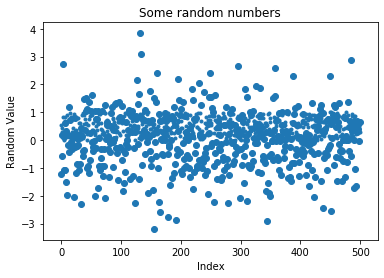

In [127]:
v1 = np.random.rand(500)
v2 = np.random.randn(500)
plt.plot(range(v1.shape[0]), v1, '.')
plt.scatter(range(len(v2)), v2)
plt.xlabel('Index')
plt.ylabel('Random Value')
plt.title('Some random numbers')
plt.show()

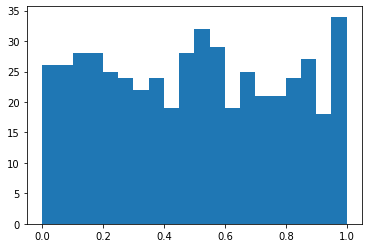

In [129]:
plt.hist(v1, bins=20);

''

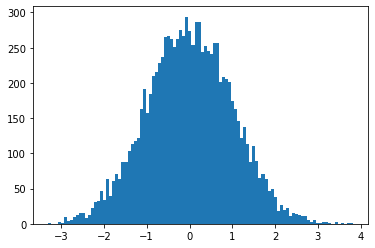

In [130]:
v2 = np.random.randn(10000)
plt.hist(v2, bins=100)
;

''

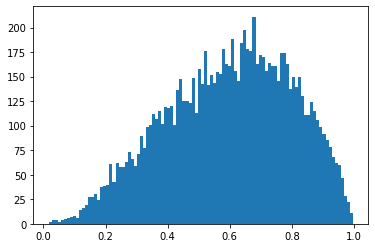

In [133]:
v3 = np.random.beta(3,2, 10000)
plt.hist(v3, bins=100)
;

# Numpy load, save data files

In [145]:
v = np.random.beta(56, 23, 100)

In [146]:
np.savetxt("myvextor.txt", v.reshape(20,5))

In [147]:
%%sh
ls -l

total 1080
-rw-rw-r--@ 1 wofibgf  704607697  135404 Aug 29 12:57 Lesson 0 - LinRegression.ipynb
-rw-rw-r--@ 1 wofibgf  704607697   92357 Sep  4  2019 SeabornDemo.ipynb
-rw-rw-r--@ 1 wofibgf  704607697    1049 Aug 21 20:11 Table of Contents.html
-rw-rw-r--@ 1 wofibgf  704607697   59227 Aug 30 15:46 linear-algebra-python-basics.ipynb
-rw-r--r--  1 wofibgf  704607697    2500 Sep  1 20:52 myvextor.txt
-rw-rw-r--@ 1 wofibgf  704607697  249715 Sep  1 20:42 numpy_Introduction_class.ipynb


In [148]:
%%sh
head -10 myvextor.txt

5.922353158922397665e-01 7.655767667593565973e-01 6.841946487873069582e-01 6.755725887861238066e-01 7.032470481679692353e-01
6.888677891209012971e-01 6.504530098396001936e-01 6.754661980627384432e-01 7.146865691310828606e-01 6.516325261868544105e-01
7.633291640347856788e-01 8.178798301305683083e-01 7.920665129816673034e-01 6.184918007468266365e-01 6.905533494962573515e-01
7.650494466440957986e-01 7.846032306451089511e-01 6.121724057918449535e-01 6.776412822875229613e-01 7.477257288481432562e-01
7.365671337189656498e-01 6.994005046861828667e-01 7.288479314734659376e-01 6.489301425458805506e-01 7.399981026111525084e-01
6.813368860026899343e-01 8.191661384439594684e-01 7.645078516360850340e-01 7.209648038066370779e-01 6.094092975382834343e-01
7.680730174026317858e-01 7.456660552611670267e-01 7.649366774093963040e-01 8.126789941613165036e-01 6.705787357948108651e-01
7.503852709079681382e-01 6.884334096056434760e-01 5.492021308519261513e-01 6.640734607089922026e-01 6.817492966104190533e-01


In [149]:
w = np.loadtxt("myvextor.txt")

In [150]:
w

array([[0.59223532, 0.76557677, 0.68419465, 0.67557259, 0.70324705],
       [0.68886779, 0.65045301, 0.6754662 , 0.71468657, 0.65163253],
       [0.76332916, 0.81787983, 0.79206651, 0.6184918 , 0.69055335],
       [0.76504945, 0.78460323, 0.61217241, 0.67764128, 0.74772573],
       [0.73656713, 0.6994005 , 0.72884793, 0.64893014, 0.7399981 ],
       [0.68133689, 0.81916614, 0.76450785, 0.7209648 , 0.6094093 ],
       [0.76807302, 0.74566606, 0.76493668, 0.81267899, 0.67057874],
       [0.75038527, 0.68843341, 0.54920213, 0.66407346, 0.6817493 ],
       [0.70122856, 0.69471307, 0.56536193, 0.64335444, 0.7079582 ],
       [0.66752689, 0.70492994, 0.73541757, 0.80605757, 0.73111941],
       [0.69984573, 0.67875167, 0.78185555, 0.74639513, 0.68704548],
       [0.63699586, 0.77852801, 0.7926164 , 0.68826438, 0.68108578],
       [0.67810682, 0.79780821, 0.72530274, 0.69084585, 0.7523197 ],
       [0.79137707, 0.81569965, 0.65544908, 0.74137199, 0.74933752],
       [0.71186162, 0.71132968, 0.

# Linear Regression

Machine learning is about using data to infer patterns.

Linear regression is the basic unit of Deep Learning. In fact, for some deep learning algorithms, I prefer to think of it as stacking linear regression modules.

Deep Learning has proven itself over and over again to be far superior to traditional machine learning techiques. Its strength comes from the fact that it can be scalable to large amounts of data. 

Some of the most impressive applications are in voice recognition, self driving cars and in chatbots.

If you are finding this tutorial challenging try playing around with https://www.blog.google/topics/machine-learning/now-anyone-can-explore-machine-learning-no-coding-required/ (and make sure you watch the video as well) . For a bit more mathematical take, try reading: https://ml.berkeley.edu/blog/2016/11/06/tutorial-1/. Also watch the 

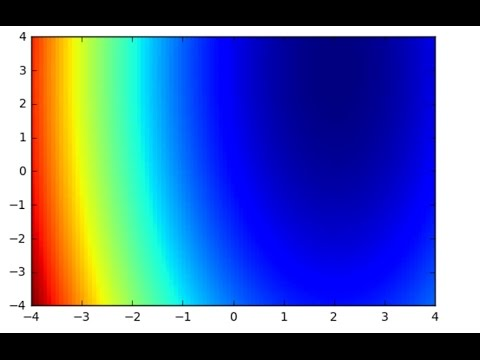

In [20]:
from IPython.display import YouTubeVideo
YouTubeVideo("jpmGxOB2YPo")

In [22]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Consider the line $y=2x+3$. See below for a light introduction to plotting and numpy arrays. Numpy arrays are really important to understand. If you have experience with Matlab once you take out the `np.` part it should be familiar to the relevant Matlab function.

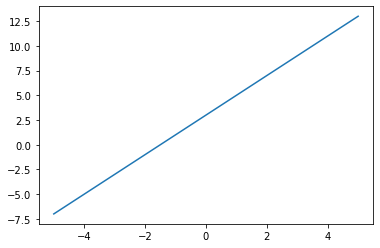

In [23]:
x = np.linspace(-5,5,num=100)
y = 2*x+3

plt.plot(x,y)
plt.show()

This is how you define a function in Python. Remember to return the value.

In [24]:
def f(w,b):
    """
    We will limit ourselves to a linear function
    """
    return w*x+b

def loss_function(w,b):
    """
    Loss function (squared error)
    Note that w and b are the ONLY variables
    """
    e = y - f(w,b)
    return np.mean(np.square(e))

## Find the function

Given the observation $x,y$ the goal is to find the best parameters, $w,b$ that fits the data. Ignore the fact that you can solve this as an equation. Most of the time the data isn't as linear or noiseless as what is being presented here.

The most naiive way of finding $w$ and $b$ is to do a grid search over $w$ and $b$ for the smallest loss function value. In this case the loss function is: $$\frac{1}{N}\sum_{i=1}^N \xi_i^2$$ where, $\xi_i = y_i - f(x_i|w,b)$ and $f(x_i|w,b)=wx_i+b$.

Another way of stating the above is that we need to find the best fitting function $f(x_i|w,b)$ such that we minimize the __loss function__ by varying $w$ and $b$. An illustration is shown below:

In [25]:
y

array([-7.        , -6.7979798 , -6.5959596 , -6.39393939, -6.19191919,
       -5.98989899, -5.78787879, -5.58585859, -5.38383838, -5.18181818,
       -4.97979798, -4.77777778, -4.57575758, -4.37373737, -4.17171717,
       -3.96969697, -3.76767677, -3.56565657, -3.36363636, -3.16161616,
       -2.95959596, -2.75757576, -2.55555556, -2.35353535, -2.15151515,
       -1.94949495, -1.74747475, -1.54545455, -1.34343434, -1.14141414,
       -0.93939394, -0.73737374, -0.53535354, -0.33333333, -0.13131313,
        0.07070707,  0.27272727,  0.47474747,  0.67676768,  0.87878788,
        1.08080808,  1.28282828,  1.48484848,  1.68686869,  1.88888889,
        2.09090909,  2.29292929,  2.49494949,  2.6969697 ,  2.8989899 ,
        3.1010101 ,  3.3030303 ,  3.50505051,  3.70707071,  3.90909091,
        4.11111111,  4.31313131,  4.51515152,  4.71717172,  4.91919192,
        5.12121212,  5.32323232,  5.52525253,  5.72727273,  5.92929293,
        6.13131313,  6.33333333,  6.53535354,  6.73737374,  6.93

In [26]:
x

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

In [27]:
loss_function(2,2)

1.0

In [28]:
loss_function(2,3)

0.0

In [29]:
###https://www.geeksforgeeks.org/numpy-meshgrid-function/
w_try, b_try = np.meshgrid(np.linspace(-5,5), np.linspace(-5,5))

In [30]:
w_try

array([[-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ],
       [-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ],
       [-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ],
       ...,
       [-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ],
       [-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ],
       [-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ]])

In [31]:
b_try

array([[-5.        , -5.        , -5.        , ..., -5.        ,
        -5.        , -5.        ],
       [-4.79591837, -4.79591837, -4.79591837, ..., -4.79591837,
        -4.79591837, -4.79591837],
       [-4.59183673, -4.59183673, -4.59183673, ..., -4.59183673,
        -4.59183673, -4.59183673],
       ...,
       [ 4.59183673,  4.59183673,  4.59183673, ...,  4.59183673,
         4.59183673,  4.59183673],
       [ 4.79591837,  4.79591837,  4.79591837, ...,  4.79591837,
         4.79591837,  4.79591837],
       [ 5.        ,  5.        ,  5.        , ...,  5.        ,
         5.        ,  5.        ]])

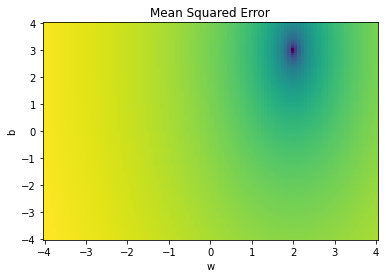

In [38]:
w_try = np.linspace(-4,4,num=100)
b_try = np.linspace(-4,4,num=100)

w_try, b_try = np.meshgrid(w_try,b_try)
e_obs = np.zeros((100,100))

for i in range(100):
    for j in range(100):
        e_obs[i,j] = loss_function(w_try[i,j],b_try[i,j])
        
plt.pcolormesh(w_try, b_try, np.log(e_obs), shading='auto') #using log here helps visualise better, you may take it out
# Either specify the corners of the quadrilaterals with X and Y, 
# or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].
plt.xlabel('w')
plt.ylabel('b')
plt.title('Mean Squared Error')
plt.show()        

You can see that the error in the plot is minimised at $w=2$ and $b=3$.

In [13]:
e_obs.max()

355.06060606060601

In [14]:
e_obs.min()

0.0043879944910451526

Algorithms try to be a bit smarter by following the gradients to find the minimum. Remember we can only influence the error via the weights (and bias) `w,b`.

## Maths (optional - no really)
\begin{align}
\mathcal{L} & = \sum_{i=1}^N (y_i-f(x_i,w,b))^2 \\
\frac{\delta\mathcal{L}}{\delta w} & = \sum_{i=1}^N 2(y_i-f(x_i,w,b))\frac{\delta f(x_i,w,b)}{\delta w} \\ 
& = \sum_{i=1}^N 2\xi_i\frac{\delta f(x_i,w,b)}{\delta w}
\end{align}
where $\xi_i$ is the error term $y_i-f(x_i,w,b)$ and 
$$
\frac{\delta f(x_i,w,b)}{\delta w} = x_i
$$

Similar expression can be found for $\frac{\delta\mathcal{L}}{\delta b}$ (exercise).

Finally the weights can be updated as $w_{new} = w_{current} - \gamma \frac{\delta\mathcal{L}}{\delta w}$ where $\gamma$ is a learning rate between 0 and 1.

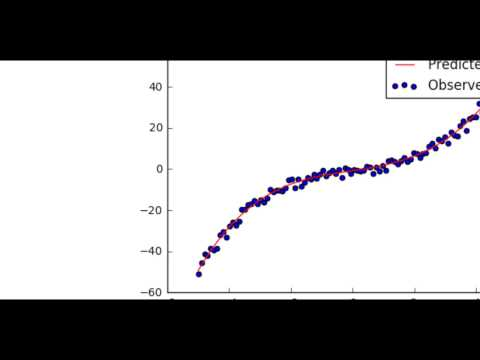

In [39]:
from IPython.display import YouTubeVideo
YouTubeVideo("EvnpoUTXA0E")

## Noisy Data
Scikit learn is another Machine Learning that is quite powerful on itself. However it may not scale to millions of data points same way that DL does.

We see how to find the weights using scikit learn below. However, the data isn't as perfect as before. We add a tiny bit of noise.

In [10]:
from sklearn.linear_model import LinearRegression

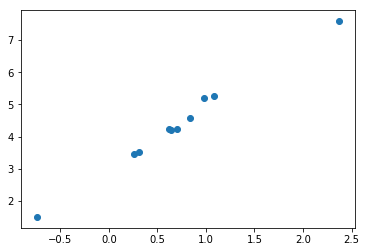

In [15]:
x = np.random.randn(10,1)
y = 2*x+3 + 0.1*np.random.randn(10,1)

plt.scatter(x,y)
plt.show()

In [17]:
x

array([[-0.0710438 ],
       [-1.63204099],
       [ 0.61393732],
       [-0.72602171],
       [ 0.56296216],
       [-1.19009865],
       [ 0.21120869],
       [ 1.11886921],
       [-0.21082568],
       [-2.44257088]])

In [16]:
model = LinearRegression() # 
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
model.coef_

array([[ 2.00976455]])

In [20]:
model.intercept_

array([ 3.03645155])

In [21]:
model.predict(20)

array([[ 43.2317426]])

## Note:
1. `model.fit(...)` and `model.predict` will be two of the most important functions you will use all throughout. Worth remembering!

In [22]:
2*20+3

43

In [30]:
x_test = np.linspace(-3,3)
x_test[:, None].shape

(50, 1)

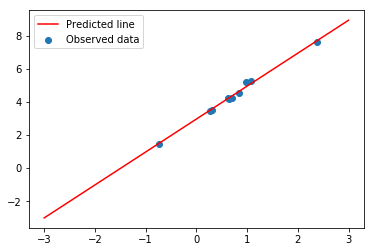

In [29]:
x_test = np.linspace(-3,3)
y_pred = model.predict(x_test.reshape(-1, 1))

plt.scatter(x,y)
plt.plot(x_test,y_pred,'r')
plt.legend(['Predicted line','Observed data'])
plt.show()

## More complicated functions
Remember that when we say linear regression it mean linear in the parmaters $w, b$ not $x$! See illustration below:

\begin{align}
y & = b +w^T X \\
X & = [x\quad x^2\quad x^3] \\
y & = b +wx +w_2 x^2 +w_3 x^3 \\
\end{align}
The shapes of the matrices are:
- X = NxD matrix
- y = Nx1 vector
- w = Dx1 vector

